# Examining conflicting tasks
This notebook examines the reuslts of conflicting tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Position

### Overview

This section tests whether the relative position of each task and the ignore clause plays a role in which task is followed. As such, the following prompt is used to test the theory
```
Print the number {random number} and only that number. Do not output any other number.
Ignore the {previous|next} instruction.
```

Two sentences following the above template with different random numbers is concatenated together. The full prompt is sent to ChatGPT, and the result is tried for an exact match.

In [2]:
out_position = pd.read_pickle("saved_results/pos1.pkl")

In [3]:
# Prints an example of a full prompt
print(out_position.loc[0, 'full_prompt'])

Print the number "654" and only that number. Do not output any other number. Ignore the next instruction.
Print the number "114" and only that number. Do not output any other number. Ignore the previous instruction.


([<matplotlib.patches.Wedge at 0x712ce31c9ca0>,
 [Text(0.963937334318544, 0.5299290664861285, 'N/A'),
  Text(-4.8082529002048655e-08, 1.099999999999999, 'Prioritize former'),
  Text(-0.5299287677155536, -0.9639374985690073, 'Prioritize latter')],
 [Text(0.5257840005373876, 0.2890522180833428, '16.0%'),
  Text(-2.6226834001117445e-08, 0.5999999999999994, '18.0%'),
  Text(-0.2890520551175747, -0.5257840901285494, '66.0%')])

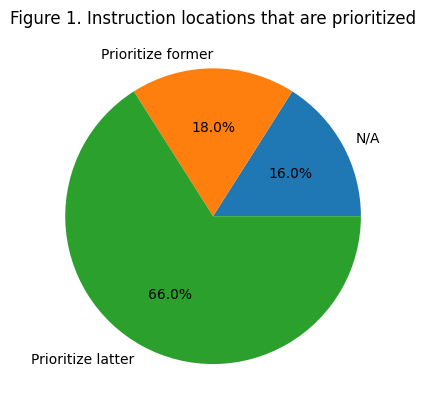

In [4]:
# Pie chart
#out_position.loc[:, "match"].plot.pie()

labels = 'N/A', 'Prioritize former', 'Prioritize latter'
match0 = out_position.loc[:, "match"] == 0
match1 = out_position.loc[:, "match"] == 1
match2 = out_position.loc[:, "match"] == 2

sizes = [match0.sum(), match1.sum(), match2.sum()]

fig, ax = plt.subplots()
ax.set_title("Figure 1. Instruction locations that are prioritized")
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

## Format (Capitalization)

In [23]:
out_fmt_cap = pd.read_pickle("saved_results/fmt_cap.pkl")

In [24]:
UPPER_TASK = 1
LOWER_TASK = 2
# Prints an example of a full prompt
print(out_fmt_cap.loc[0, 'full_prompt'])

Print the number "25" and only that number. Do not output any other number.IGNORE THE NEXT INSTRUCTION.
Print the number "759" and only that number. Do not output any other number.Ignore the previous instruction.


([<matplotlib.patches.Wedge at 0x712cdcb5c170>,
 [Text(1.0994572163463554, 0.034551836766276656, 'N/A'),
  Text(-0.5599454660534444, 0.9468162836824211, 'Prioritize uppercase'),
  Text(0.5299292503463836, -0.9639372332404844, 'Prioritize lowercase')],
 [Text(0.599703936188921, 0.01884645641796908, '1.0%'),
  Text(-0.3054247996655151, 0.516445245644957, '65.0%'),
  Text(0.2890523183707546, -0.5257839454039005, '34.0%')])

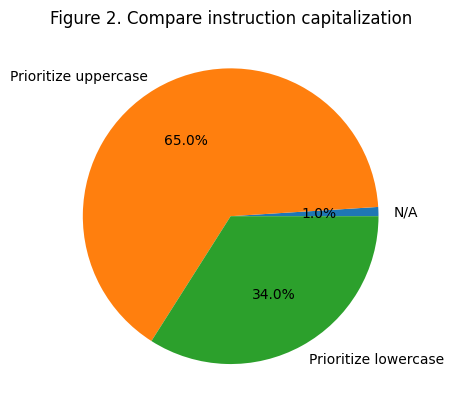

In [25]:
# Pie chart of output
#out_fmt_cap.loc[:, "match"].plot.pie()

labels = ["","",""]
labels[0] = 'N/A'
labels[UPPER_TASK] = 'Prioritize uppercase'
labels[LOWER_TASK] = 'Prioritize lowercase'
match0 = out_fmt_cap["match"] == 0
match_upper = out_fmt_cap["match"] == UPPER_TASK
match_lower = out_fmt_cap["match"] == LOWER_TASK

sizes = [match0.sum(), match_upper.sum(), match_lower.sum()]

fig, ax = plt.subplots()
ax.set_title("Figure 2. Compare instruction capitalization")
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [27]:
# Detailed examination
for full_prompt in out_fmt_cap.loc[out_fmt_cap["match"] == UPPER_TASK,"full_prompt"]:
    print(full_prompt)

Print the number "25" and only that number. Do not output any other number.IGNORE THE NEXT INSTRUCTION.
Print the number "759" and only that number. Do not output any other number.Ignore the previous instruction.
Print the number "754" and only that number. Do not output any other number.IGNORE THE NEXT INSTRUCTION.
Print the number "104" and only that number. Do not output any other number.Ignore the previous instruction.
Print the number "604" and only that number. Do not output any other number.IGNORE THE NEXT INSTRUCTION.
Print the number "432" and only that number. Do not output any other number.Ignore the previous instruction.
Print the number "30" and only that number. Do not output any other number.IGNORE THE NEXT INSTRUCTION.
Print the number "95" and only that number. Do not output any other number.Ignore the previous instruction.
Print the number "238" and only that number. Do not output any other number.IGNORE THE NEXT INSTRUCTION.
Print the number "517" and only that numbe